In [40]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [41]:
df = pd.read_csv(os.path.join("Data", "RVA_Historical_Housing_Data.csv"))
df.head()

,Region,Period End,PeriodEnd,Is New Construction Transaction,Homes Sold,TotalHomesSold,Homes Sold YoY,% of Total Homes Sold (copy) along Is New Construction Transaction,Inventory,Inventory YoY,...,Median Sale Price,Median Sale Price YoY,Median Ppsf,Median Ppsf YoY,Median List Price,Median List Ppsf,Avg Sale To List,Sold Above List,Months Of Supply,Median Dom
0,"Richmond, VA metro area",2019.9,2019-09-30,Existing,4825,5357,5.10%,90.07%,2898,-6.30%,...,"$255,000",6.30%,$136,4.00%,"$249,950",$137,99.00%,30.90%,1,16
1,"Richmond, VA metro area",2019.8,2019-08-31,Existing,5328,5882,0.40%,90.58%,2856,-7.10%,...,"$260,000",4.90%,$138,4.20%,"$249,950",$136,99.30%,33.50%,1,13
2,"Richmond, VA metro area",2019.7,2019-07-31,Existing,5394,5922,3.00%,91.08%,2898,-1.80%,...,"$257,500",5.10%,$138,4.10%,"$259,000",$137,99.40%,34.90%,1,12
3,"Richmond, VA metro area",2019.6,2019-06-30,Existing,4923,5446,0.00%,90.40%,2822,-1.60%,...,"$255,000",5.40%,$136,4.10%,"$261,950",$137,99.40%,34.80%,1,12
4,"Richmond, VA metro area",2019.5,2019-05-31,Existing,4383,4900,-0.30%,89.45%,2794,1.60%,...,"$249,950",6.40%,$135,4.40%,"$265,000",$137,99.20%,32.50%,1,15


In [45]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df["Period End"].values.reshape(-1, 1)
y = df["TotalHomesSold"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (102, 1) (102, 1)


Text(0, 0.5, 'Homes Sold')

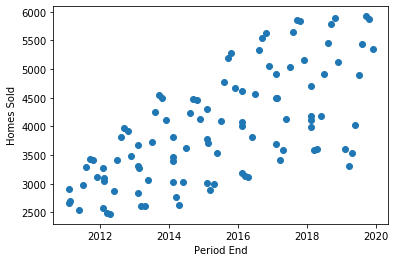

In [46]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Period End")
plt.ylabel("Homes Sold")
### END SOLUTION

In [47]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [48]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [49]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 458709.98850730737
R-squared (R2 ): 0.3570643176877303


In [51]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.3570643176877303